<a href="https://colab.research.google.com/github/Rullyro/tubesandat/blob/main/tubesanalisisdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Library

In [21]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import statistics as stat
import seaborn as sns
import scipy as stats
from scipy.stats import ttest_1samp, ttest_ind

Load Dataset

In [2]:
col_names = ['Sand %', 'Clay %', 'Silt %', 'pH', 'EC mS/cm', 'O.M. %', 'CACO3 %', 'N_NO3 ppm', 'P ppm', 'K ppm', 'Mg ppm', 'Fe ppm', 'Zn ppm', 'Mn ppm', 'Cu ppm', 'B ppm', 'Class']
feature_cols = ['Sand %', 'Clay %', 'Silt %', 'pH', 'EC mS/cm', 'O.M. %', 'CACO3 %', 'N_NO3 ppm', 'P ppm', 'K ppm', 'Mg ppm', 'Fe ppm', 'Zn ppm', 'Mn ppm', 'Cu ppm', 'B ppm']
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/tanahnew.csv")
df

Mounted at /content/drive


,ID,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm,Class
0,1,42,38,20,5.16,0.27,3.78,0.00,14.46,18.61,147,1115,91.32,0.89,27.06,1.77,0.40,Tidak Optimal
1,2,54,26,20,6.07,0.36,1.45,0.00,14.59,32.74,180,1055,60.04,3.66,17.58,1.68,0.41,Optimal
2,3,28,36,36,6.92,0.68,1.77,0.40,14.91,19.02,183,1215,61.24,3.06,18.00,1.84,0.46,Optimal
3,4,58,20,22,7.70,0.36,0.72,6.80,4.21,6.28,116,327,19.54,1.64,5.04,0.84,0.50,Tidak Optimal
4,5,33,41,26,7.61,0.39,1.00,4.39,6.11,6.55,228,939,25.84,0.18,7.16,1.22,0.40,Tidak Optimal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,777,26,46,28,6.72,0.45,2.08,0.00,7.66,20.67,395,500,38.07,0.39,26.48,1.47,0.33,Optimal
777,778,40,28,32,7.79,0.34,1.38,30.00,5.20,4.14,286,154,12.79,0.24,6.33,0.60,0.12,Tidak Optimal
778,779,34,28,38,7.63,1.14,1.87,24.30,17.13,6.90,582,164,10.73,0.44,5.39,1.14,0.26,Tidak Optimal
779,780,16,38,46,7.73,0.39,1.72,46.30,3.92,7.93,335,572,11.61,0.26,3.77,2.20,0.27,Tidak Optimal


In [3]:
df.rename(columns = {'Sand %':'Sand', 
                     'Clay %' : 'Clay', 
                     'Silt %' : 'Silt', 
                     'EC mS/cm' : 'EC', 
                     'O.M. %' : 'OM', 
                     'CACO3 %' : 'CACO3', 
                     'N_NO3 ppm' : 'N_NO3/ppm',
                     'P ppm' : 'P/ppm',
                     'Mg ppm' : 'Mg/ppm',
                     'Fe ppm' : 'Fe/ppm',
                     'Zn ppm' : 'Zn/ppm',
                     'Mn ppm' : 'Mn/ppm',
                     'Cu ppm' : 'Cu/ppm',
                     'B ppm' : 'B/ppm',
                     'K ppm' : 'K/ppm',
                     }, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         781 non-null    int64  
 1   Sand       781 non-null    int64  
 2   Clay       781 non-null    int64  
 3   Silt       781 non-null    int64  
 4   pH         781 non-null    float64
 5   EC         781 non-null    float64
 6   OM         781 non-null    float64
 7   CACO3      781 non-null    float64
 8   N_NO3/ppm  781 non-null    float64
 9   P/ppm      781 non-null    float64
 10  K ppm      781 non-null    int64  
 11  Mg/ppm     781 non-null    int64  
 12  Fe/ppm     781 non-null    float64
 13  Zn/ppm     781 non-null    float64
 14  Mn/ppm     780 non-null    float64
 15  Cu/ppm     781 non-null    float64
 16  B/ppm      781 non-null    float64
 17  Class      781 non-null    object 
dtypes: float64(11), int64(6), object(1)
memory usage: 110.0+ KB


# **Basic Descriptive Statistic**

## Describe

In [4]:
df.describe()

,ID,Sand,Clay,Silt,pH,EC,OM,CACO3,N_NO3/ppm,P/ppm,K ppm,Mg/ppm,Fe/ppm,Zn/ppm,Mn/ppm,Cu/ppm,B/ppm
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,780.000000,781.000000,781.000000
mean,391.000000,31.528809,34.998720,33.475032,7.133662,0.453252,2.028899,13.422049,11.623367,13.840627,296.226633,821.025608,31.203355,0.674789,15.870500,2.031472,0.383828
std,225.599572,10.978452,11.252065,8.382886,0.897815,0.304888,0.627254,13.381635,11.052076,14.586021,194.461073,742.228950,26.013775,0.680787,15.169134,2.455696,0.222063
min,1.000000,10.000000,6.000000,14.000000,4.490000,0.130000,0.370000,0.000000,0.180000,1.070000,31.000000,60.000000,4.630000,0.100000,2.380000,0.210000,0.100000
25%,196.000000,24.000000,28.000000,28.000000,6.660000,0.340000,1.590000,1.800000,5.280000,5.730000,169.000000,364.000000,13.210000,0.310000,6.750000,1.080000,0.230000
50%,391.000000,30.000000,36.000000,32.000000,7.550000,0.400000,1.960000,8.710000,8.850000,9.490000,255.000000,568.000000,19.870000,0.480000,10.105000,1.480000,0.350000
75%,586.000000,38.000000,44.000000,38.000000,7.780000,0.500000,2.370000,22.000000,14.310000,15.980000,358.000000,1010.000000,43.150000,0.770000,19.162500,2.130000,0.480000
max,781.000000,70.000000,64.000000,68.000000,8.200000,5.620000,4.980000,77.600000,120.640000,152.420000,1665.000000,4836.000000,187.940000,7.090000,189.210000,33.910000,1.900000


## Distribusi salah satu data (pH)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


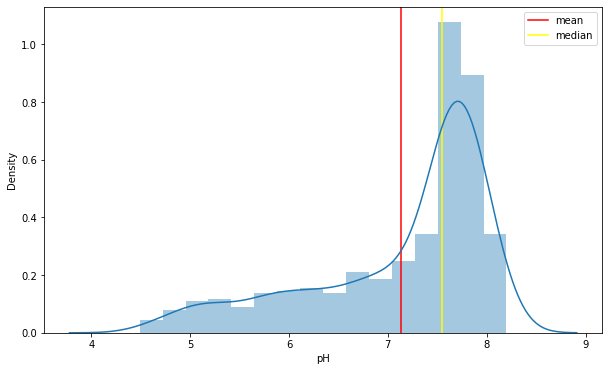

In [16]:
plt.figure(figsize = (10, 6))
plt.axvline(df['pH'].describe()['mean'], color = 'red', label = 'mean')
plt.axvline(df['pH'].describe()['50%'], color = 'yellow', label = 'median')
sns.distplot(df['pH'])
plt.legend()

## Mean

In [6]:
df.mean(numeric_only=True)

ID           391.000000
Sand          31.528809
Clay          34.998720
Silt          33.475032
pH             7.133662
EC             0.453252
OM             2.028899
CACO3         13.422049
N_NO3/ppm     11.623367
P/ppm         13.840627
K ppm        296.226633
Mg/ppm       821.025608
Fe/ppm        31.203355
Zn/ppm         0.674789
Mn/ppm        15.870500
Cu/ppm         2.031472
B/ppm          0.383828
dtype: float64

## Median

In [5]:
df.median(numeric_only=True)

ID           391.000
Sand          30.000
Clay          36.000
Silt          32.000
pH             7.550
EC             0.400
OM             1.960
CACO3          8.710
N_NO3/ppm      8.850
P/ppm          9.490
K ppm        255.000
Mg/ppm       568.000
Fe/ppm        19.870
Zn/ppm         0.480
Mn/ppm        10.105
Cu/ppm         1.480
B/ppm          0.350
dtype: float64

## Jumlah Nilai

In [7]:
df.value_counts()

ID   Sand  Clay  Silt  pH    EC    OM    CACO3  N_NO3/ppm  P/ppm  K ppm   Mg/ppm  Fe/ppm  Zn/ppm  Mn/ppm  Cu/ppm  B/ppm  Class        
1    42    38    20    5.16  0.27  3.78  0.0    14.46      18.61  147     1115    91.32   0.89    27.06   1.77    0.40   Tidak Optimal    1
537  24    46    30    6.89  0.43  2.20  3.8    9.91       31.92  266     1591    22.54   0.49    9.36    1.22    0.18   Optimal          1
515  16    54    30    6.20  0.38  3.52  2.0    26.86      38.93  300     2632    80.09   0.85    31.55   1.50    0.65   Optimal          1
516  14    60    26    6.35  0.50  3.19  2.0    10.44      32.05  655     3167    73.59   1.05    26.33   1.78    0.84   Optimal          1
517  26    56    18    7.36  0.50  2.57  11.8   20.61      5.73   473     1846    13.83   0.44    14.75   0.93    0.36   Optimal          1
                                                                                                                                         ..
263  22    44    34    7.

Mencari rata-rata pH terhadap tiap jenis tanah

In [17]:
rataSand = df.groupby('Sand')['pH'].mean()
rataSilt = df.groupby('Silt')['pH'].mean()
rataClay = df.groupby('Clay')['pH'].mean()

print("Rata rata pH terhadap Sand \n",rataSand)
print("\n")
print("Rata rata pH terhadap Silt \n",rataSilt)
print("\n")
print("Rata rata pH terhadap Clay \n",rataClay)

Rata rata pH terhadap Sand 
 Sand
10    7.899000
12    7.790000
14    7.643846
16    7.595862
18    7.441538
20    7.433478
22    7.277222
24    7.396250
26    7.187273
27    5.700000
28    7.226724
29    6.280000
30    7.115902
31    7.550000
32    6.871111
33    7.610000
34    7.095227
36    7.060000
37    6.470000
38    6.768462
40    7.271458
42    6.954242
43    6.630000
44    6.626786
46    7.371000
47    6.880000
48    6.430370
50    6.796667
52    7.493750
54    6.510909
56    5.817143
58    7.193333
62    7.302500
64    6.780000
66    5.542500
68    7.465000
70    5.800000
Name: pH, dtype: float64


Rata rata pH terhadap Silt 
 Silt
14    7.170000
16    7.560000
18    6.976000
20    6.856667
22    6.933333
24    6.851364
26    6.965000
28    6.909398
30    6.833125
32    7.137073
34    7.126271
36    7.210833
38    7.385932
40    7.326512
42    7.097632
44    7.750370
46    7.390833
48    7.752857
50    7.776667
52    7.591818
54    7.195000
56    7.935000
58    7.806667
60   

## Measure of Spread

### Standard Deviasi

In [11]:
df.std(numeric_only=True)

ID           225.599572
Sand          10.978452
Clay          11.252065
Silt           8.382886
pH             0.897815
EC             0.304888
OM             0.627254
CACO3         13.381635
N_NO3/ppm     11.052076
P/ppm         14.586021
K ppm        194.461073
Mg/ppm       742.228950
Fe/ppm        26.013775
Zn/ppm         0.680787
Mn/ppm        15.169134
Cu/ppm         2.455696
B/ppm          0.222063
dtype: float64

## Quartile Check

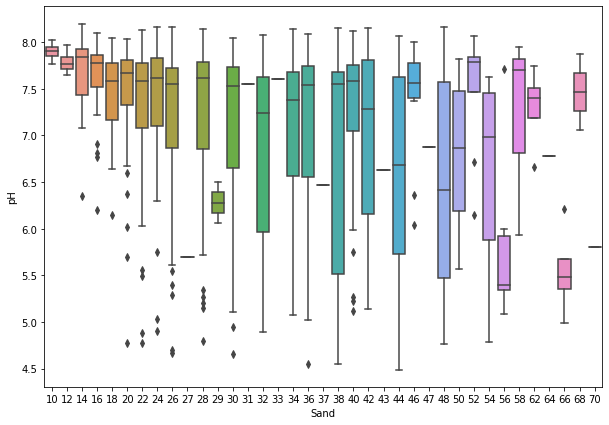

In [18]:
plt.figure(figsize=(10,7))
sns.boxplot(x = "Sand", y = "pH", data = df)

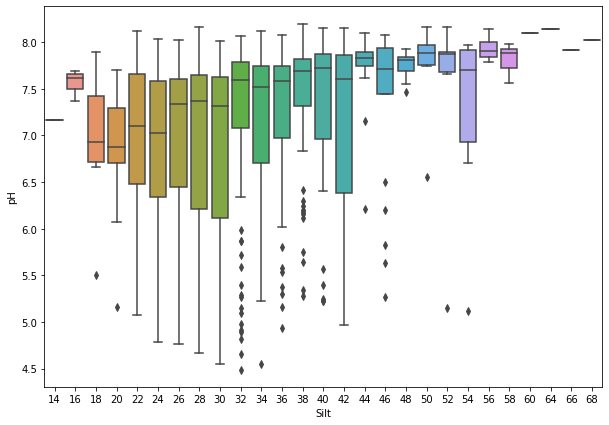

In [19]:
plt.figure(figsize=(10,7))
sns.boxplot(x = "Silt", y = "pH", data = df)

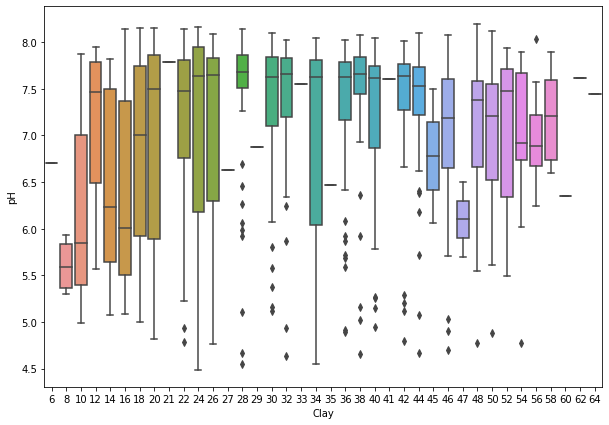

In [20]:
plt.figure(figsize=(10,7))
sns.boxplot(x = "Clay", y = "pH", data = df)

# **Statistik Inferensial**

In [ ]:
df.head()

## Uji Hipotesis
### Jenis tanah terhadap tanah yang lainnya

In [22]:
alpha = 0.05

stat, p = ttest_ind(df['Sand'], df['Silt'])

print('t=%.3f, p=%.3f' % (stat, p))

# Uji hipotesis
if p < alpha:
    print('Tolak H0 sehingga Sand tidak sama dengan Silt')
else:
    print('Gagal Tolak H0, sehingga Sand sama dengan Silt')

t=-3.938, p=0.000
Tolak H0 sehingga Sand tidak sama dengan Silt


In [23]:
alpha = 0.05

stat, p = ttest_ind(df['Silt'], df['Clay'])

print('t=%.3f, p=%.3f' % (stat, p))

# Uji hipotesis
if p < alpha:
    print('Tolak H0 sehingga Silt tidak sama dengan Clay')
else:
    print('Gagal Tolak H0, sehingga Silt sama dengan Clay')

t=-3.035, p=0.002
Tolak H0 sehingga Silt tidak sama dengan Clay


In [24]:
alpha = 0.05

stat, p = ttest_ind(df['Clay'], df['Sand'])

print('t=%.3f, p=%.3f' % (stat, p))

# Uji hipotesis
if p < alpha:
    print('Tolak H0 sehingga Clay tidak sama dengan Sand')
else:
    print('Gagal Tolak H0, sehingga Clay sama dengan Sand')

t=6.168, p=0.000
Tolak H0 sehingga Clay tidak sama dengan Sand


# **Data Preparataion**


In [26]:
# Konversi EC
df['EC mS/cm']=df['EC mS/cm']*10
df['EC mS/cm'].describe()

count    781.000000
mean       4.532522
std        3.048878
min        1.300000
25%        3.400000
50%        4.000000
75%        5.000000
max       56.200000
Name: EC mS/cm, dtype: float64

In [27]:
df

,ID,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm,Class
0,1,42,38,20,5.16,2.7,3.78,0.00,14.46,18.61,147,1115,91.32,0.89,27.06,1.77,0.40,Tidak Optimal
1,2,54,26,20,6.07,3.6,1.45,0.00,14.59,32.74,180,1055,60.04,3.66,17.58,1.68,0.41,Optimal
2,3,28,36,36,6.92,6.8,1.77,0.40,14.91,19.02,183,1215,61.24,3.06,18.00,1.84,0.46,Optimal
3,4,58,20,22,7.70,3.6,0.72,6.80,4.21,6.28,116,327,19.54,1.64,5.04,0.84,0.50,Tidak Optimal
4,5,33,41,26,7.61,3.9,1.00,4.39,6.11,6.55,228,939,25.84,0.18,7.16,1.22,0.40,Tidak Optimal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,777,26,46,28,6.72,4.5,2.08,0.00,7.66,20.67,395,500,38.07,0.39,26.48,1.47,0.33,Optimal
777,778,40,28,32,7.79,3.4,1.38,30.00,5.20,4.14,286,154,12.79,0.24,6.33,0.60,0.12,Tidak Optimal
778,779,34,28,38,7.63,11.4,1.87,24.30,17.13,6.90,582,164,10.73,0.44,5.39,1.14,0.26,Tidak Optimal
779,780,16,38,46,7.73,3.9,1.72,46.30,3.92,7.93,335,572,11.61,0.26,3.77,2.20,0.27,Tidak Optimal


## Splitting Feature & Class

In [28]:
X = df.iloc[:,1:17] # Features
Y = pd.DataFrame(df['Class']) # Target variable

In [29]:
X

,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm
0,42,38,20,5.16,2.7,3.78,0.00,14.46,18.61,147,1115,91.32,0.89,27.06,1.77,0.40
1,54,26,20,6.07,3.6,1.45,0.00,14.59,32.74,180,1055,60.04,3.66,17.58,1.68,0.41
2,28,36,36,6.92,6.8,1.77,0.40,14.91,19.02,183,1215,61.24,3.06,18.00,1.84,0.46
3,58,20,22,7.70,3.6,0.72,6.80,4.21,6.28,116,327,19.54,1.64,5.04,0.84,0.50
4,33,41,26,7.61,3.9,1.00,4.39,6.11,6.55,228,939,25.84,0.18,7.16,1.22,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,26,46,28,6.72,4.5,2.08,0.00,7.66,20.67,395,500,38.07,0.39,26.48,1.47,0.33
777,40,28,32,7.79,3.4,1.38,30.00,5.20,4.14,286,154,12.79,0.24,6.33,0.60,0.12
778,34,28,38,7.63,11.4,1.87,24.30,17.13,6.90,582,164,10.73,0.44,5.39,1.14,0.26
779,16,38,46,7.73,3.9,1.72,46.30,3.92,7.93,335,572,11.61,0.26,3.77,2.20,0.27


## **Missing Value**

In [33]:
jumlah_missing = pd.isnull(df).sum()
jumlah_missing

ID           0
Sand %       0
Clay %       0
Silt %       0
pH           0
EC mS/cm     0
O.M. %       0
CACO3 %      0
N_NO3 ppm    0
P ppm        0
K ppm        0
Mg ppm       0
Fe ppm       0
Zn ppm       0
Mn ppm       0
Cu ppm       0
B ppm        0
Class        0
dtype: int64

In [31]:
df['Mn ppm'].fillna(int(df['Mn ppm'].mean()), inplace=True)

## **Duplicate Data**

In [35]:
# Cek Data Duplicate
ids = df["ID"]
df[ids.isin(ids[ids.duplicated()])]

,ID,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm,Class


## Cek Tipe Data

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         781 non-null    int64  
 1   Sand %     781 non-null    int64  
 2   Clay %     781 non-null    int64  
 3   Silt %     781 non-null    int64  
 4   pH         781 non-null    float64
 5   EC mS/cm   781 non-null    float64
 6   O.M. %     781 non-null    float64
 7   CACO3 %    781 non-null    float64
 8   N_NO3 ppm  781 non-null    float64
 9   P ppm      781 non-null    float64
 10  K ppm      781 non-null    int64  
 11  Mg ppm     781 non-null    int64  
 12  Fe ppm     781 non-null    float64
 13  Zn ppm     781 non-null    float64
 14  Mn ppm     781 non-null    float64
 15  Cu ppm     781 non-null    float64
 16  B ppm      781 non-null    float64
 17  Class      781 non-null    object 
dtypes: float64(11), int64(6), object(1)
memory usage: 110.0+ KB


###  **Modelling**

Membangun Train Test Data

Membangun Model Classifier